<a href="https://colab.research.google.com/github/yumi-jun/Data_Analysis/blob/main/%EC%9E%AC%ED%99%9C%ED%9B%88%EB%A0%A8_%EC%8B%9C%EA%B3%84%EC%97%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import re

# 데이터 로드
file_path ='TrackerData.csv'
data = pd.read_csv(file_path, delimiter=';')

# 데이터 파싱 함수
def parse_tracking_data(tracking_data):
    if pd.isna(tracking_data) or 'null' in tracking_data:
        return [None, None, None], [None, None, None, None]

    position_match = re.search(r'position\s*:\s*\(([^)]+)\)', tracking_data)
    rotation_match = re.search(r'rotation\s*:\s*\(([^)]+)\)', tracking_data)

    position = [float(num) for num in position_match.group(1).split(',')] if position_match else [None, None, None]
    rotation = [float(num) for num in rotation_match.group(1).split(',')] if rotation_match else [None, None, None, None]

    return position, rotation

# 각 포인트별 데이터 추출
tracking_points = data.columns[1:]  # 첫 번째 열은 시간 정보이므로 제외
positions = {}
rotations = {}

for point in tracking_points:
    print(point)
    extracted_data = data[point].apply(parse_tracking_data)
    positions[point] = [data[0] for data in extracted_data]
    rotations[point] = [data[1] for data in extracted_data]

# 위치 및 회전 데이터를 데이터프레임으로 저장
position_df = pd.DataFrame(positions, columns=tracking_points)
rotation_df = pd.DataFrame(rotations, columns=tracking_points)

# 결과 확인
print(position_df.head())
print(rotation_df.head())


LeftHand
RightHand
Head
LeftShoulder
RightShoulder
LeftElbow
RightElbow
Chest
           LeftHand         RightHand              Head     LeftShoulder  \
0  [-0.3, 0.8, 0.3]  [-0.1, 0.8, 0.2]  [-0.3, 1.0, 0.2]  [0.2, 0.7, 0.5]   
1  [-0.3, 0.8, 0.3]  [-0.1, 0.8, 0.2]  [-0.3, 1.0, 0.2]  [0.2, 0.7, 0.5]   
2  [-0.3, 0.8, 0.3]  [-0.1, 0.8, 0.2]  [-0.3, 1.0, 0.2]  [0.2, 0.7, 0.5]   
3  [-0.3, 0.8, 0.3]  [-0.1, 0.8, 0.2]  [-0.3, 1.0, 0.2]  [0.2, 0.7, 0.5]   
4  [-0.3, 0.8, 0.3]  [-0.1, 0.8, 0.2]  [-0.3, 1.0, 0.2]  [0.2, 0.7, 0.5]   

     RightShoulder         LeftElbow          RightElbow               Chest  
0  [0.1, 0.7, 0.4]  [-0.2, 0.6, 0.1]  [None, None, None]  [None, None, None]  
1  [0.1, 0.7, 0.4]  [-0.2, 0.6, 0.1]  [None, None, None]  [None, None, None]  
2  [0.1, 0.7, 0.4]  [-0.2, 0.6, 0.1]  [None, None, None]  [None, None, None]  
3  [0.1, 0.7, 0.4]  [-0.2, 0.6, 0.1]  [None, None, None]  [None, None, None]  
4  [0.1, 0.7, 0.4]  [-0.2, 0.6, 0.1]  [None, None, None]  [None, None,

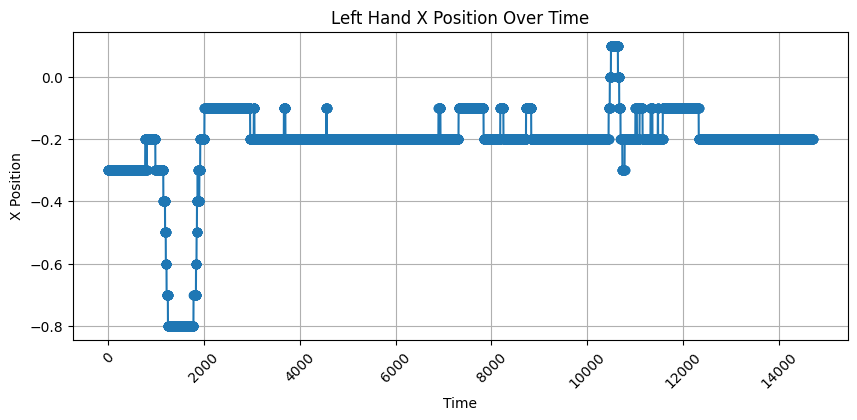

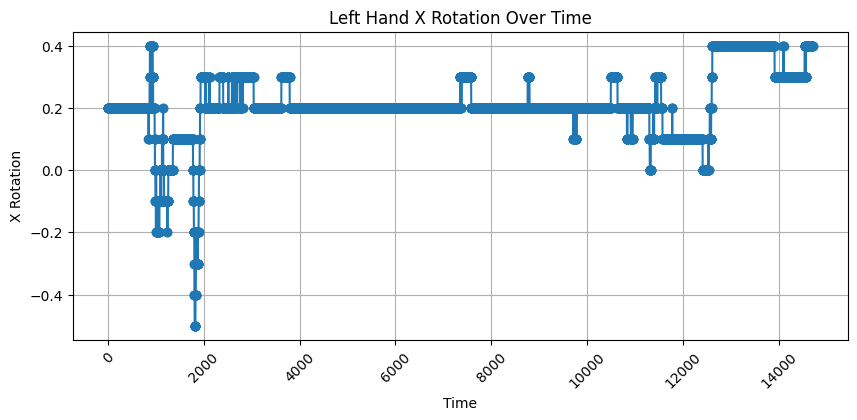

{'LeftHand': {'mean': -0.2118259095545733, 'std': 0.1360774311867033, 'min': -0.8, 'max': 0.1}, 'RightHand': {'mean': 0.27755865351921116, 'std': 0.181008237447616, 'min': -0.1, 'max': 0.8}, 'Head': {'mean': -0.024557943416757346, 'std': 0.08678380398355065, 'min': -0.3, 'max': 0.1}, 'LeftShoulder': {'mean': 0.2, 'std': 0.0, 'min': 0.2, 'max': 0.2}, 'RightShoulder': {'mean': 0.1, 'std': 0.0, 'min': 0.1, 'max': 0.1}, 'LeftElbow': {'mean': -0.2, 'std': 0.0, 'min': -0.2, 'max': -0.2}, 'RightElbow': {'mean': None, 'std': None, 'min': None, 'max': None}, 'Chest': {'mean': None, 'std': None, 'min': None, 'max': None}} {'LeftHand': {'mean': 0.21088065283917037, 'std': 0.10203608763031127, 'min': -0.5, 'max': 0.4}, 'RightHand': {'mean': 0.06165929955797348, 'std': 0.27202109958400383, 'min': -0.7, 'max': 0.5}, 'Head': {'mean': -0.08450081610446138, 'std': 0.09983587456005359, 'min': -0.2, 'max': 0.5}, 'LeftShoulder': {'mean': -0.4, 'std': 0.0, 'min': -0.4, 'max': -0.4}, 'RightShoulder': {'mean

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# 데이터 로드
file_path = 'TrackerData.csv'
data = pd.read_csv(file_path, delimiter=';')

# 데이터 파싱 함수
def parse_tracking_data(tracking_data):
    if pd.isna(tracking_data) or 'null' in tracking_data:
        return [None, None, None], [None, None, None, None]

    position_match = re.search(r'position\s*:\s*\(([^)]+)\)', tracking_data)
    rotation_match = re.search(r'rotation\s*:\s*\(([^)]+)\)', tracking_data)

    position = [float(num) for num in position_match.group(1).split(',')] if position_match else [None, None, None]
    rotation = [float(num) for num in rotation_match.group(1).split(',')] if rotation_match else [None, None, None, None]

    return position, rotation

# 추적 포인트 설정
tracking_points = data.columns[1:]  # 첫 번째 열은 시간 정보이므로 제외

# 각 추적 포인트 데이터 추출 및 파싱
positions = {}
rotations = {}
for point in tracking_points:
    extracted_data = data[point].apply(parse_tracking_data)
    positions[point] = [data[0] for data in extracted_data if data[0][0] is not None]  # None을 제외한 유효한 데이터만 저장
    rotations[point] = [data[1] for data in extracted_data if data[1][0] is not None]

# 기술 통계 계산 함수
def calculate_descriptive_stats(data):
    filtered_data = [x for x in data if x is not None]
    if not filtered_data:
        return {"mean": None, "std": None, "min": None, "max": None}
    return {
        "mean": np.mean(filtered_data),
        "std": np.std(filtered_data),
        "min": np.min(filtered_data),
        "max": np.max(filtered_data)
    }

# 각 추적 포인트의 X 위치 및 X 회전에 대한 기술 통계
stats_positions = {point: calculate_descriptive_stats([pos[0] for pos in positions[point]])
                   for point in positions}
stats_rotations = {point: calculate_descriptive_stats([rot[0] for rot in rotations[point]])
                   for point in rotations}

# 시계열 시각화
def plot_time_series(data, title, y_label):
    plt.figure(figsize=(10, 4))
    plt.plot(data, marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(y_label)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# 선택된 추적 포인트의 X 위치 및 X 회전 시각화
plot_time_series([pos[0] for pos in positions['LeftHand']], 'Left Hand X Position Over Time', 'X Position')
plot_time_series([rot[0] for rot in rotations['LeftHand']], 'Left Hand X Rotation Over Time', 'X Rotation')

# 기술 통계 결과 출력
print(stats_positions, stats_rotations)


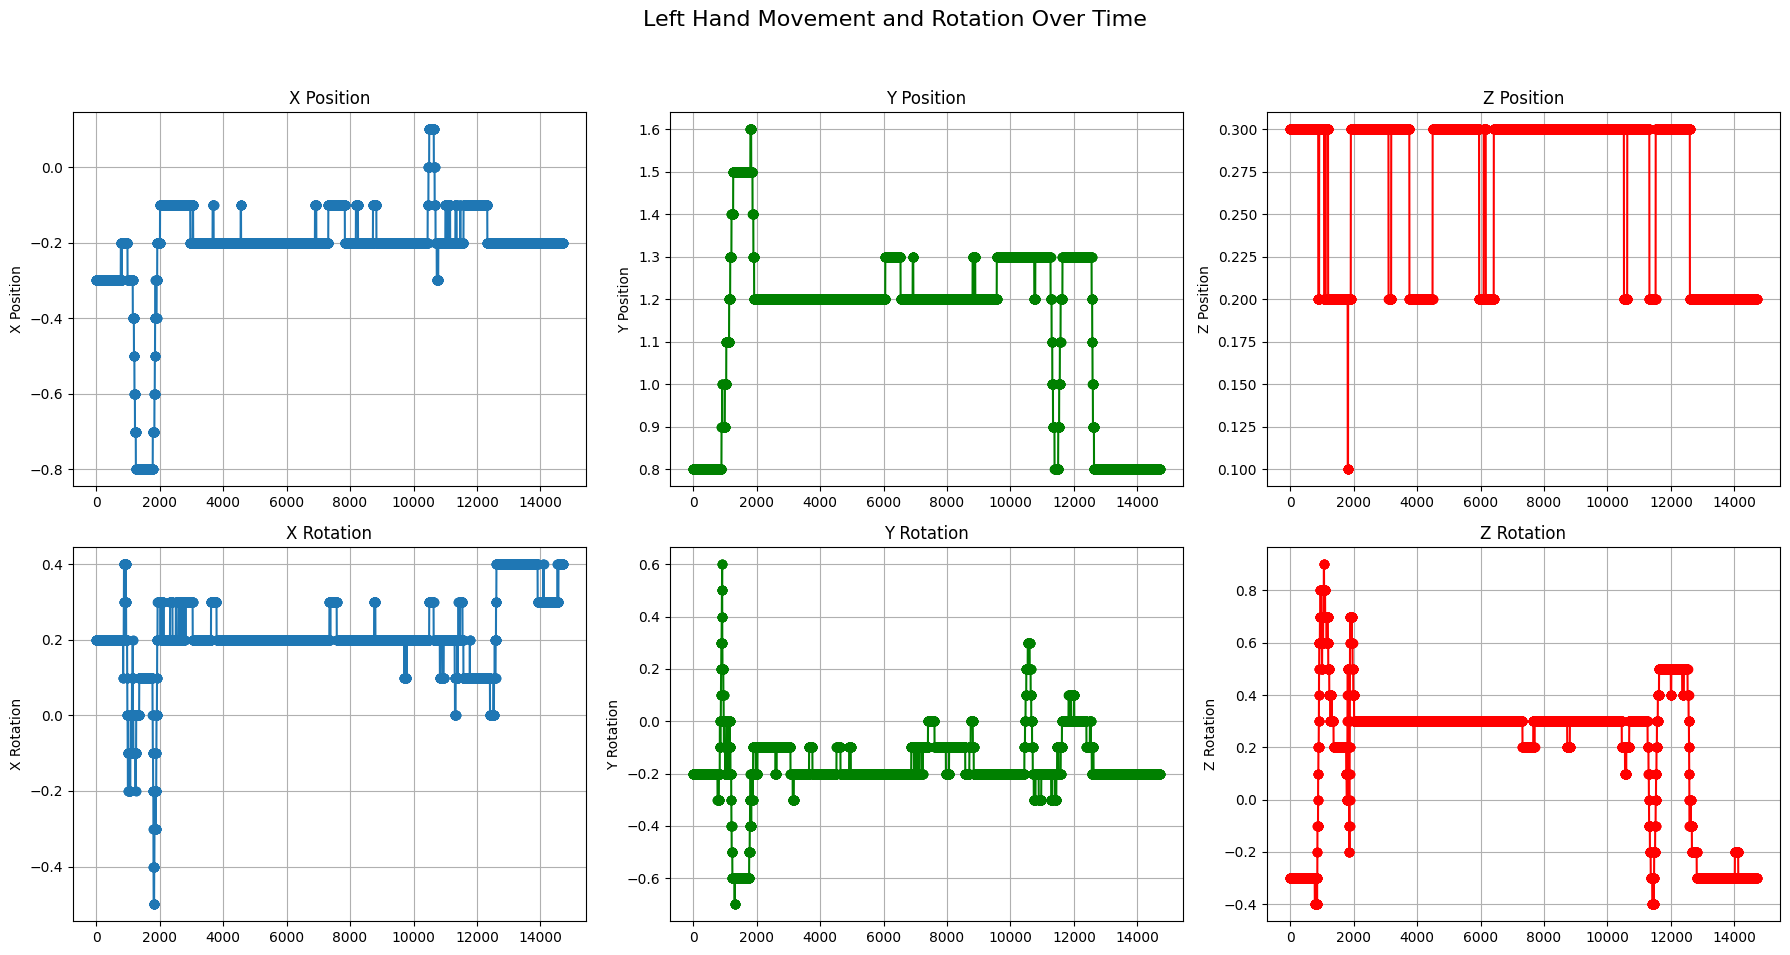

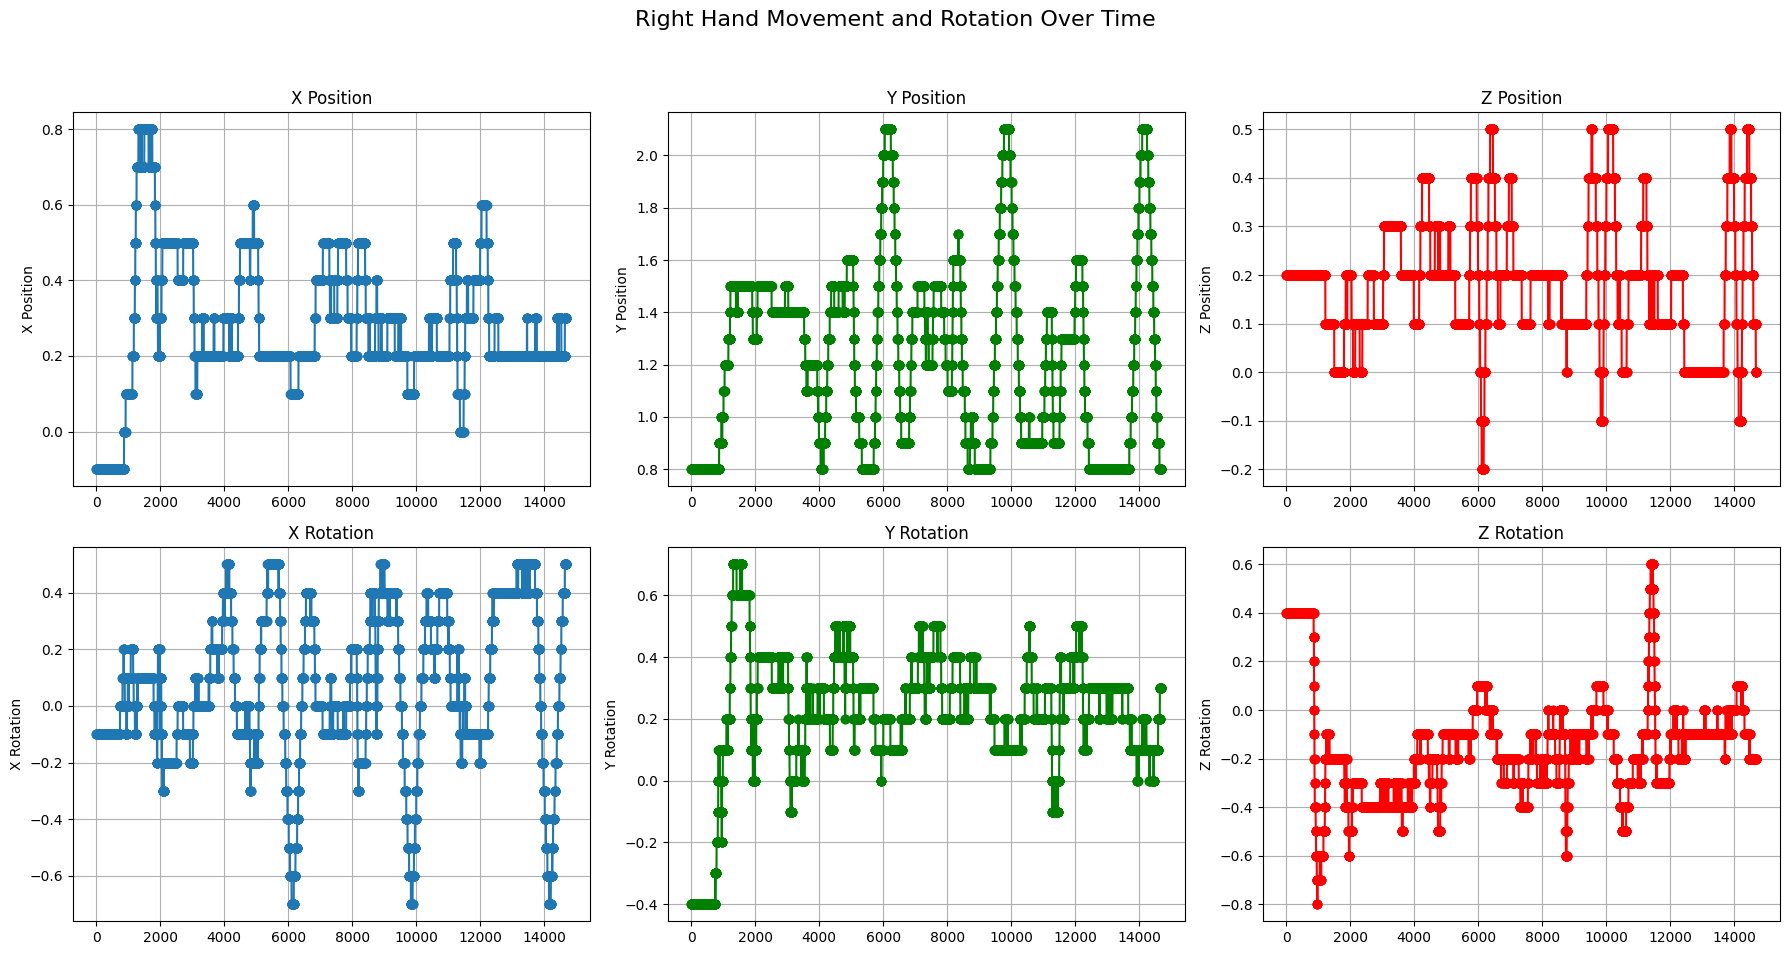

In [10]:
# 시각화 함수 확장 - X, Y, Z 위치 및 회전 시각화
def plot_time_series_xyz(positions, rotations, point_name):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
    fig.suptitle(f'{point_name} Movement and Rotation Over Time', fontsize=16)

    # 위치 데이터 시각화
    axes[0, 0].plot([pos[0] for pos in positions], marker='o', linestyle='-')
    axes[0, 0].set_title('X Position')
    axes[0, 0].set_ylabel('X Position')
    axes[0, 0].grid(True)

    axes[0, 1].plot([pos[1] for pos in positions], marker='o', linestyle='-', color='green')
    axes[0, 1].set_title('Y Position')
    axes[0, 1].set_ylabel('Y Position')
    axes[0, 1].grid(True)

    axes[0, 2].plot([pos[2] for pos in positions], marker='o', linestyle='-', color='red')
    axes[0, 2].set_title('Z Position')
    axes[0, 2].set_ylabel('Z Position')
    axes[0, 2].grid(True)

    # 회전 데이터 시각화
    axes[1, 0].plot([rot[0] for rot in rotations], marker='o', linestyle='-')
    axes[1, 0].set_title('X Rotation')
    axes[1, 0].set_ylabel('X Rotation')
    axes[1, 0].grid(True)

    axes[1, 1].plot([rot[1] for rot in rotations], marker='o', linestyle='-', color='green')
    axes[1, 1].set_title('Y Rotation')
    axes[1, 1].set_ylabel('Y Rotation')
    axes[1, 1].grid(True)

    axes[1, 2].plot([rot[2] for rot in rotations], marker='o', linestyle='-', color='red')
    axes[1, 2].set_title('Z Rotation')
    axes[1, 2].set_ylabel('Z Rotation')
    axes[1, 2].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# 'LeftHand'와 'RightHand'의 X, Y, Z 위치 및 회전 시각화
plot_time_series_xyz(positions['LeftHand'], rotations['LeftHand'], 'Left Hand')
plot_time_series_xyz(positions['RightHand'], rotations['RightHand'], 'Right Hand')


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# 데이터 로드
file_path = 'TrackerData.csv'
data = pd.read_csv(file_path, delimiter=';')
data['Time'] = pd.to_datetime(data.iloc[:, 0], format='%m/%d/%Y %I:%M:%S:%f %p')

# 데이터 파싱 함수
def parse_tracking_data(tracking_data):
    if pd.isna(tracking_data) or 'null' in tracking_data:
        return [None, None, None], [None, None, None, None]

    position_match = re.search(r'position\s*:\s*\(([^)]+)\)', tracking_data)
    rotation_match = re.search(r'rotation\s*:\s*\(([^)]+)\)', tracking_data)

    position = [float(num) for num in position_match.group(1).split(',')] if position_match else [None, None, None]
    rotation = [float(num) for num in rotation_match.group(1).split(',')] if rotation_match else [None, None, None, None]

    return position, rotation

# 추적 포인트 설정
tracking_points = data.columns[1:]

# 각 추적 포인트 데이터 추출 및 파싱
positions = {}
rotations = {}
for point in tracking_points:
    extracted_data = data[point].apply(parse_tracking_data)
    positions[point] = [data[0] for data in extracted_data if data[0][0] is not None]
    rotations[point] = [data[1] for data in extracted_data if data[1][0] is not None]

# 상대 시간을 계산
tracker_start_time = data['Time'].iloc[0]
data['RelativeTime'] = (data['Time'] - tracker_start_time).dt.total_seconds()

In [13]:
# 라벨 데이터 로드
label_file_path = 'LabelData.csv'
label_data = pd.read_csv(label_file_path, delimiter=';')

# 라벨 데이터 시간 파싱
label_data['Time'] = pd.to_datetime(label_data['Time'], format='%m/%d/%Y %I:%M:%S:%f %p')
label_data['RelativeTime'] = (label_data['Time'] - tracker_start_time).dt.total_seconds()

# 라벨 데이터 분리
start_times = label_data[label_data['Label'] == 'start_2']['RelativeTime']
mid_times = label_data[label_data['Label'] == 'mid']['RelativeTime']
final_times = label_data[label_data['Label'] == 'final']['RelativeTime']

In [14]:
# 라벨 데이터를 시계열 데이터에 매핑하는 함수
def map_relative_times_to_indices(time_series, relative_times):
    label_positions = []
    for rel_time in relative_times:
        closest_index = (np.abs(time_series['RelativeTime'] - rel_time)).argmin()
        label_positions.append(closest_index)
    return label_positions

# 각 추적 포인트에 라벨 매핑
def get_label_positions_for_point(point_name):
    time_series_point = pd.DataFrame({'RelativeTime': data['RelativeTime'], 'x_position': [pos[0] for pos in positions[point_name]]})
    start_label_positions = map_relative_times_to_indices(time_series_point, start_times)
    mid_label_positions = map_relative_times_to_indices(time_series_point, mid_times)
    final_label_positions = map_relative_times_to_indices(time_series_point, final_times)
    return start_label_positions, mid_label_positions, final_label_positions


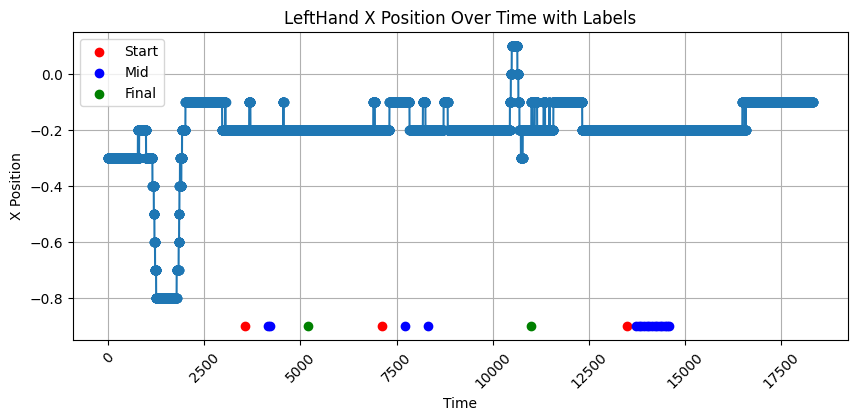

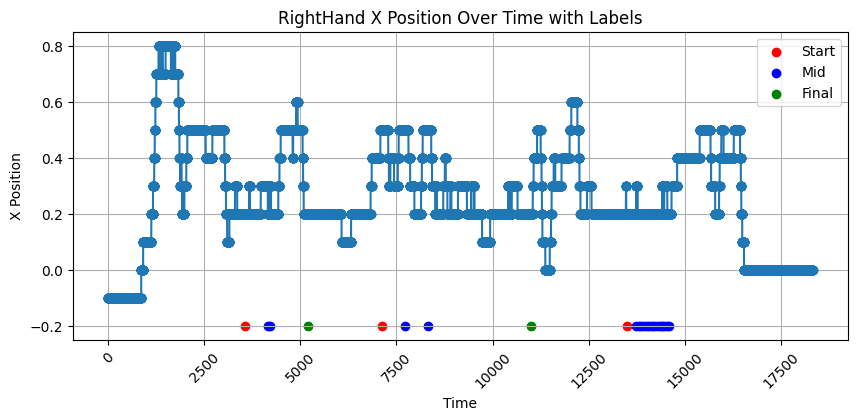

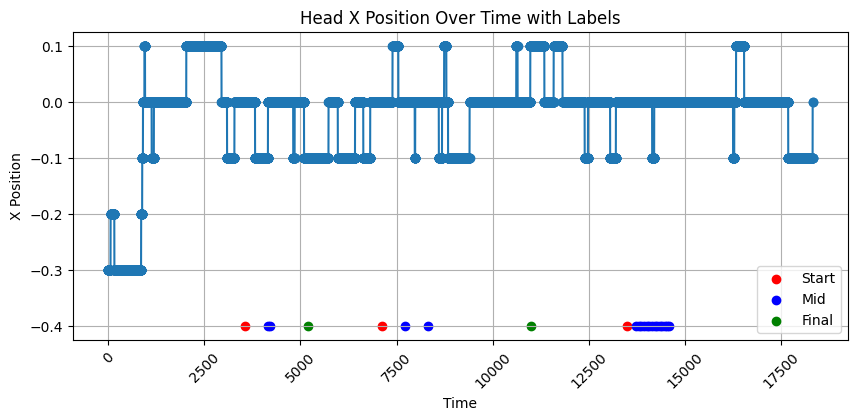

In [15]:
# 시각화 함수
def plot_time_series_with_labels_as_dots(data, title, y_label, start_labels, mid_labels, final_labels):
    plt.figure(figsize=(10, 4))
    plt.plot(data, marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(y_label)
    plt.grid(True)
    plt.xticks(rotation=45)

    added_labels = set()
    for index in start_labels:
        plt.scatter(index, min(data) - 0.1, color='red', marker='o', label='Start' if 'Start' not in added_labels else "")
        added_labels.add('Start')

    for index in mid_labels:
        plt.scatter(index, min(data) - 0.1, color='blue', marker='o', label='Mid' if 'Mid' not in added_labels else "")
        added_labels.add('Mid')

    for index in final_labels:
        plt.scatter(index, min(data) - 0.1, color='green', marker='o', label='Final' if 'Final' not in added_labels else "")
        added_labels.add('Final')

    plt.legend()
    plt.show()

# 각 포인트 시각화
body_points = ['LeftHand', 'RightHand', 'Head']
for point in body_points:
    if point in positions:
        start_label_positions, mid_label_positions, final_label_positions = get_label_positions_for_point(point)
        plot_time_series_with_labels_as_dots(
            [pos[0] for pos in positions[point]],
            f'{point} X Position Over Time with Labels',
            'X Position',
            start_label_positions,
            mid_label_positions,
            final_label_positions
        )